In [1]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [2]:
def check_auth_name(phrase):
    for w in phrase.split():
        if len(w)<3:
            return True
        
def invalid_term(phrase):
    if (len(phrase)<=3) or (len(phrase.split())>3) or (check_auth_name(phrase)): #or (len(phrase.split())==1)
        return True
    
    for w in phrase.split():
        if not w.isalpha():
            return True
    return False

In [3]:
import pickle
def save_obj(obj, name):
    pickle.dump(obj,open(name + '.pkl', 'wb'), protocol=4)
    
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Load data

In [4]:
# load texts
ds = pd.read_csv('articles_for_term_extraction.csv')
ds.head()

,author,title,abstract,articles,references,num_symbols,num_words,num_sentences
0,SC Zhi,(The impact and future of edible landscapes on...,: edible landscape urban development sustainab...,urban forestry & urban greening journal homepa...,references acga (2022). what is a community ga...,49261,6104,535
1,SC Tak,(A bibliometric analysis of building informati...,: building information modelling developing co...,heliyon journal homepage: review article bibli...,references questionnaires interviews delphi me...,11129,1494,128
2,SC Can,(Sustainability Transitions in the Constructio...,sustainability transition constitutes an impor...,review sustainability transitions construction...,"references in documents to 20, which yielded 4...",26845,2985,258
3,SC Mat,(International Journal for Quality research),this article is based on a systematic research...,international journal quality research () – is...,"references: abdul-hamid, a. q., ali, m. h., os...",40355,4933,660
4,SC Zhe,(A review of integration between BIM and CFD f...,: building information modeling (bim) computat...,building environment journal homepage: review ...,"references [1] m. santamouris, a. synnefa, t. ...",56176,7064,449


In [5]:
# Создаем два новых DataFrame, фильтруя исходный датасет
area = 'CE'
ds = ds[ds['author'].str.startswith(area)]
#ds_ce = ds[ds['author'].str.startswith('CE')]

print(f"{area} Articles:")
print(ds.head())
print(f"\nNumber of {area} articles:", len(ds))

#print("\nCE Articles:")
#print(ds_ce.head())
#print("\nNumber of CE articles:", len(ds_ce))

#ds_sc.to_csv('SC_Articles.csv', index=False)
#ds_ce.to_csv('CE_Articles.csv', index=False)

CE Articles:
     author                                              title  \
233  CE Far  (Circulating the E-Waste Recovery from the Con...   
234  CE Wen  (New insights into the green cement composites...   
235  CE Kaz  (Identification of parameters and indicators f...   
236  CE San  journal of polymers and the environment https:...   
237  CE Sza  (A Critical Review on Modification Methods of ...   

                                              abstract  \
233  : material flow analysis; circular economy; e-...   
234  : biochar carbon emission reduction cement add...   
235  circular economy circular built environment ci...   
236  end-of-life treatment of construction, renovat...   
237  : cement composites; nanocellulose; nanomateri...   

                                              articles  \
233  review circulating e-waste recovery constructi...   
234  resources, conservation & recycling journal ho...   
235  kazmi chakraborty journal engineering applied ...   
236  jour

In [6]:
text = ' '.join(list(ds.articles.values))
#text

In [7]:
#routine to remove punctuation, taken from https://blog.enterprisedna.co/python-remove-punctuation-from-string/#:~:text=To%20remove%20punctuation%20from%20a,new%20string%20excluding%20punctuation%20marks.

import string

def remove_punctuation(input_string):
    # Make a translation table that maps all punctuation characters to None
    translator = str.maketrans("", "", string.punctuation)

    # Apply the translation table to the input string
    result = input_string.translate(translator)

    return result

# TFIDF Approach

## Preprocess text

In [8]:
texts = text.split('. ')

#remove punctuation

def rem_punc(t):
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890'''

    # remove punctuation from the string
    for c in punctuations:
        t=t.replace(c,' ')

    # display the unpunctuated string
    return t.replace('\n',' ')

no_punc_text = [rem_punc(t) for t in tqdm(texts)]

<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_153383/819277843.py:7: SyntaxWarning: invalid escape sequence '\,'
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890'''


  0%|          | 0/38392 [00:00<?, ?it/s]

In [9]:
#lowercase
lc_text = [t.lower().strip() for t in tqdm(no_punc_text)]
lc_text[0]

  0%|          | 0/38392 [00:00<?, ?it/s]

'review circulating e waste recovery construction demolition industries  review shahjadi hisan farjana    anmol sarfraj rajwani   tatenda miriam mungombe   hasith madhumahda kahanda gamage     olubukola tokede mahmud ashraf school engineering  deakin university  geelong   australia  mahmud ashraf deakin edu au  m a   school architecture   built environment  deakin university  geelong   australia  olubukola tokede deakin edu au   correspondence  shahjadisynthy gmail com abstract  e waste electronic waste uses electrical power power cord plug battery'

## Vectorize texts

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(tqdm(lc_text))
X.shape

  0%|          | 0/38392 [00:00<?, ?it/s]

(38392, 509008)

In [12]:
len(vectorizer.get_feature_names_out())

509008

In [13]:
vectorizer.get_feature_names_out()[:100]

array(['aa ra', 'aa ra landfill', 'aa ra unspecified', 'aac analyzed',
       'aac analyzed scientiﬁc', 'aac based', 'aac based mortars',
       'aac based pastes', 'aac blocks', 'aac blocks composition',
       'aac blocks liang', 'aac blocks zhao', 'aac cai', 'aac cai et',
       'aac cement', 'aac cement quiklime', 'aac composition',
       'aac composition copper', 'aac copper', 'aac copper tailings',
       'aac fang', 'aac fang et', 'aac incorporating',
       'aac incorporating glass', 'aac investigated',
       'aac investigated et', 'aac masonry', 'aac masonry units',
       'aac mass', 'aac mass iron', 'aac matrix',
       'aac matrix tetrahedral', 'aac maximize',
       'aac maximize possibility', 'aac mix', 'aac mix developed',
       'aac mortar', 'aac mortar mixes', 'aac mortars',
       'aac mortars successfully', 'aac mortars using', 'aac product',
       'aac units', 'aac units analyzed', 'aac units inﬂuenced',
       'aac units potential', 'aac units produced', 'aac u

In [14]:
average_tfidf = X.sum(axis=0)#/X.getnnz(axis=0)

In [15]:
type(np.squeeze(np.asarray(average_tfidf)))#.shape

numpy.ndarray

In [16]:
average_tfidf.shape

(1, 509008)

array([[<Axes: title={'center': '0'}>]], dtype=object)

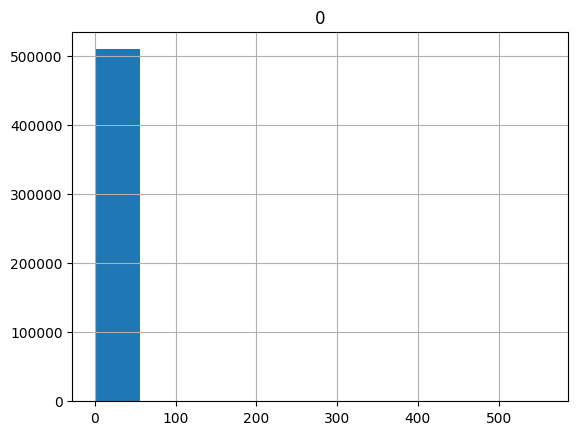

In [17]:
pd.DataFrame(np.squeeze(np.asarray(average_tfidf))).hist()

In [18]:
pd.DataFrame(np.squeeze(np.asarray(average_tfidf))).describe()

,0
count,509008.000000
mean,0.268328
std,0.907430
min,0.010965
25%,0.163525
50%,0.201705
75%,0.262502
max,558.450432


In [19]:
#Create vocabulary
vocab = vectorizer.get_feature_names_out()

In [20]:
# Get term importance
term_importance = np.squeeze(np.asarray(average_tfidf))

## Find out if we have such term in the text?

In [21]:
len(text)

3666378

In [22]:
text[:100]

'review circulating e-waste recovery construction demolition industries: review shahjadi hisan farjan'

In [23]:
is_term = [True if (t in text) and (not invalid_term(t)) else False for t in tqdm(vocab)]
is_term[:100]

  0%|          | 0/509008 [00:00<?, ?it/s]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True]

In [24]:
np.array(vocab)[is_term].shape

(311929,)

array([[<Axes: title={'center': '0'}>]], dtype=object)

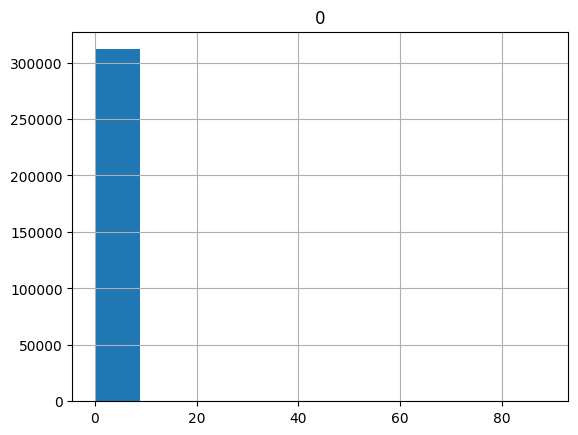

In [25]:
pd.DataFrame(np.squeeze(np.asarray(average_tfidf)))[is_term].hist()

In [26]:
vocab = np.array(vocab)[is_term]
term_importance = term_importance[is_term]
term_importance.argsort()

array([217163,  13113,  93305, ..., 155659,  53313,  43666])

In [27]:
print(term_importance[66961])
print(vocab[66961])
print()
print(term_importance[75707])
print(vocab[75707])

0.18593033884762475
created pyruvate

0.21591623636235716
depending origin


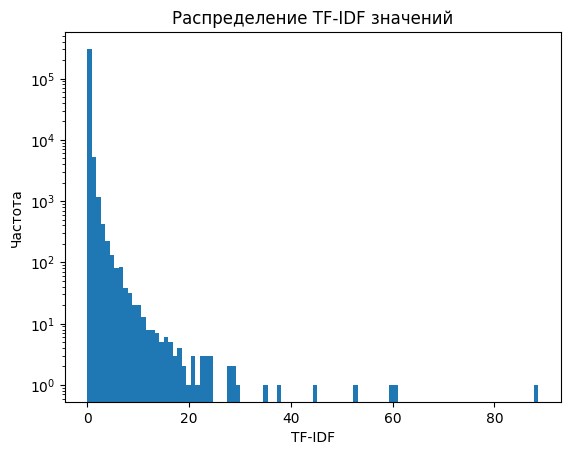

In [28]:
import matplotlib.pyplot as plt

plt.hist(term_importance, bins=100, log=True)
plt.title('Распределение TF-IDF значений')
plt.xlabel('TF-IDF')
plt.ylabel('Частота')
plt.show()

In [29]:
#vocab[term_importance.argsort()[-100:]]

In [30]:
#vocab[term_importance.argsort()[:100]]

## Determine the cutoff threshold

In [31]:
term_importance.max()

88.57808028123954

In [32]:
import numpy as np

#plt.plot([term_importance[i] for i in term_importance.argsort()])

# Создание словаря из vocab и term_importance
term_dict = dict(zip(vocab, term_importance))

# Вычисление медианы значений TF-IDF
#median_tfidf = np.median(list(term_dict.values()))

# Фильтрация терминов, значения TF-IDF которых выше медианы
filtered_terms = {term: tfidf for term, tfidf in term_dict.items() if tfidf > 1}  # > 20

print("Количество терминов после фильтрации:", len(filtered_terms))
print("Примеры важных терминов:", list(filtered_terms.keys())[:100])

Количество терминов после фильтрации: 6240
Примеры важных терминов: ['abrasion resistance', 'abren wtert', 'abren wtert brazil', 'absorption capacity', 'absorption compared', 'absorption rate', 'absorption water', 'abstract keyword', 'abstracts keywords', 'academic articles', 'academic documents', 'academic documents mentioned', 'academic domains', 'academic editor', 'academic editors', 'academic grey', 'academic grey literature', 'academic literature', 'academic publications', 'academic research', 'academy sciences', 'accepted april', 'accepted august', 'accepted december', 'accepted february', 'accepted january', 'accepted july', 'accepted june', 'accepted march', 'accepted september', 'access article', 'access article distributed', 'access article licensed', 'according akinade', 'according authors', 'according fig', 'according recent', 'according ref', 'according rios', 'according study', 'according table', 'according wbcsd', 'achieve aim', 'achieve circularity', 'achieve higher', '

In [33]:
#term_importance.argsort()[-200:]

In [34]:
#[vocab[i] for i in term_importance.argsort()[-1000:]]

In [35]:
print(len(vocab))
print(len(term_importance))
print(len(filtered_terms))

311929
311929
6240


In [36]:
chosen_terms = filtered_terms.keys()
tfidf_of_chosen_terms = filtered_terms.values()

## Find definitions

In [37]:
import wikipedia

In [38]:
len(chosen_terms)

6240

In [39]:
wiki_definitions = []
for term in tqdm(chosen_terms):
    try:
        pg = wikipedia.page(title=term, auto_suggest=False)
        definition = pg.summary[:pg.summary.index('\n')]
        wiki_definitions.append(definition)
#         print(term_vocab.index(term), term)
#         print(definition)
#         print()
    except:
        wiki_definitions.append('NA')

  0%|          | 0/6240 [00:00<?, ?it/s]

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [40]:
wiki_definitions.count('NA')/len(wiki_definitions)

0.877724358974359

In [41]:
#wiki_definitions[:100]

In [42]:
print(len(wiki_definitions))
print(len(chosen_terms))
print(len(tfidf_of_chosen_terms))

6240
6240
6240


# Чтобы заново не находить wiki definitions

In [43]:
chosen_terms = list(filtered_terms.keys())
tfidf_of_chosen_terms = list(filtered_terms.values())

# filter out terms without definitions
fltr_def = np.array(wiki_definitions) != 'NA'
wiki_definitions_loaded = np.array(wiki_definitions)[fltr_def]
chosen_terms = np.array(chosen_terms)[fltr_def]
tfidf_of_chosen_terms = np.array(tfidf_of_chosen_terms)[fltr_def]

print(len(wiki_definitions_loaded))
print(len(chosen_terms))
print(len(tfidf_of_chosen_terms))

763
763
763


In [44]:
save_obj([wiki_definitions_loaded, chosen_terms, tfidf_of_chosen_terms], f'tfidf_{area}_wikis')

In [45]:
loaded_data = load_obj(f'tfidf_{area}_wikis')

# Extract only the `wiki_definitions`
wiki_definitions_loaded = loaded_data[0]

# Verify the loaded data
print(len(wiki_definitions_loaded))
print(wiki_definitions_loaded[:10])

763
['The European Union (EU) has expanded a number of times throughout its history by way of the accession of new member states to the Union. To join the EU, a state needs to fulfil economic and political conditions called the Copenhagen criteria (after the Copenhagen summit in June 1993), which require a stable democratic government that respects the rule of law, and its corresponding freedoms and institutions. According to the Maastricht Treaty, each current member state and the European Parliament must agree to any enlargement. The process of enlargement is sometimes referred to as European integration. This term is also used to refer to the intensification of co-operation between EU member states as national governments allow for the gradual harmonisation of national laws.'
 'The absorption rate constant Ka is a value used in pharmacokinetics to describe the rate at which a drug enters into the system. It is expressed in units of time−1. The Ka is related to the absorption half-li

## Find Context

In [46]:
texts[:10]

['review circulating e-waste recovery construction demolition industries: review shahjadi hisan farjana ,* anmol sarfraj rajwani , tatenda miriam mungombe , hasith madhumahda kahanda gamage , , olubukola tokede mahmud ashraf school engineering, deakin university, geelong , australia; mahmud.ashraf@deakin.edu.au (m.a.) school architecture & built environment, deakin university, geelong , australia; olubukola.tokede@deakin.edu.au * correspondence: shahjadisynthy@gmail.com abstract: e-waste electronic waste uses electrical power power cord/plug/battery',
 'con- struction demolition (c&d) industries use various electronic components cables, switches, sockets, electrical heat pumps, air conditioning systems, solar panels, become e-waste end-of-life-cycle stages',
 'e-waste contains valuable metals/non-metals/plastics recover- able recyclable',
 'e-waste disposal banned landﬁlls victoria (australia), toxic components require additional waste separation process avoid considerable environ- men

In [47]:
context_sent = []
for term in tqdm(chosen_terms):
    for sentence in texts:
        found = False
        if term in sentence:
            context_sent.append(sentence)
            print('term:', term)
            print('sentence:', sentence)
            print()
            found = True
            break
    if not found:
        context_sent.append('NA')

  0%|          | 0/763 [00:00<?, ?it/s]

term: absorption capacity
sentence: rich pore structure improve micropore structure inside cement mortar effectively improve capillary water absorption capacity material

term: absorption rate
sentence: porous material, bc high capacity water retention, means easily absorb retain water, leading higher water absorption rate resulting bc–ccms (akhtar sarmah, a)

term: academic literature
sentence: bespoke data collection instrument utilised incorporated pertinent themes identified academic literature

term: academic publications
sentence: gray literature consists non-academic publications organizations consultancy ﬁrms policy institutes, provide practical examples insights

term: academic research
sentence: wos regarded one high-quality bibliometric data sources academic research (archambault et al., )

term: acid hydrolysis
sentence: cncs high-strength nanocellulose typically extracted cellulose ﬁbers acid hydrolysis

term: action plan
sentence: different initiatives circular economy ac

In [48]:
len(context_sent)

763

## Create dataframe

In [49]:
ds_tfidf_terms = pd.DataFrame()
ds_tfidf_terms['term'] = chosen_terms
ds_tfidf_terms['wiki_definition'] = wiki_definitions_loaded
ds_tfidf_terms['context_sent'] = context_sent
ds_tfidf_terms['importance'] = tfidf_of_chosen_terms
ds_tfidf_terms.head()

,term,wiki_definition,context_sent,importance
0,absorption capacity,The European Union (EU) has expanded a number ...,rich pore structure improve micropore structur...,4.204466
1,absorption rate,The absorption rate constant Ka is a value use...,"porous material, bc high capacity water retent...",1.507543
2,academic literature,Academic publishing is the subfield of publish...,bespoke data collection instrument utilised in...,3.299592
3,academic publications,Academic publishing is the subfield of publish...,gray literature consists non-academic publicat...,1.863699
4,academic research,"Research is ""creative and systematic work unde...",wos regarded one high-quality bibliometric dat...,3.141166


## Check similarity of the terms to NLP

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# select model from https://www.sbert.net/docs/pretrained_models.html
model_emb = SentenceTransformer('distiluse-base-multilingual-cased-v1')

def similarity_measure(text1, text2):
    # based on https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1
    text_embeddings = model_emb.encode([text1, text2])
    sim_score = cosine_similarity(text_embeddings[0].reshape(1, -1), text_embeddings[1].reshape(1, -1))
    
    return sim_score[0][0]

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [51]:
text1 = ds.articles.values[0]
simty = [similarity_measure(text1, text2) for text2 in tqdm(wiki_definitions_loaded)]

  0%|          | 0/763 [00:00<?, ?it/s]

In [52]:
ds_tfidf_terms['NLP_similarity'] = simty

<Axes: >

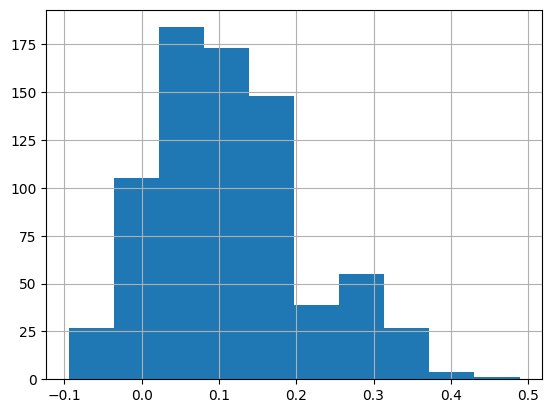

In [53]:
ds_tfidf_terms['NLP_similarity'].hist()

In [54]:
ds_tfidf_terms['NLP_similarity'].describe()

count    763.000000
mean       0.113368
std        0.098954
min       -0.094421
25%        0.042247
50%        0.097691
75%        0.173681
max        0.488909
Name: NLP_similarity, dtype: float64

In [55]:
ds_tfidf_terms.term.values[ds_tfidf_terms['NLP_similarity'] >= 0.20]

array(['aggregate concrete', 'agricultural waste', 'architectural design',
       'asphalt concrete', 'asphalt pavement', 'bearing capacity',
       'building codes', 'building deconstruction', 'building demolition',
       'building design', 'building structure', 'built environment',
       'capacity building', 'circular economy', 'civil engineering',
       'civil infrastructure', 'coarse aggregate',
       'construction engineering', 'construction operations',
       'construction waste', 'cost reduction', 'design engineering',
       'electronic waste', 'embodied energy', 'environmental assessment',
       'environmental degradation', 'environmental pollution',
       'environmental science', 'environmental sciences',
       'feedback mechanism', 'floor area', 'food waste',
       'glass recycling', 'glass waste', 'green building',
       'green buildings', 'high potential', 'impact assessment',
       'industrial ecology', 'industrial parks',
       'institutional review board', '

In [56]:
ds_tfidf_terms.sort_values(by="NLP_similarity", ascending=False, inplace=True)

In [57]:
ds_tfidf_terms.head()

,term,wiki_definition,context_sent,importance,NLP_similarity
53,building deconstruction,"In the context of physical construction, decon...",[] developed bim-based deconstruction assessme...,2.280702,0.488909
138,construction waste,Construction waste or debris is any kind of de...,kazmi chakraborty journal engineering applied ...,8.277890,0.427581
202,electronic waste,Electronic waste (or e-waste) describes discar...,review circulating e-waste recovery constructi...,1.076244,0.422629
229,environmental assessment,Environmental Impact assessment (EIA) is the a...,"using bim-based framework, economic environmen...",8.236292,0.386762
571,resource recovery,Resource recovery is using wastes as an input ...,identify assess important circularity indicato...,3.585023,0.383116


In [58]:
from matplotlib import pyplot as plt

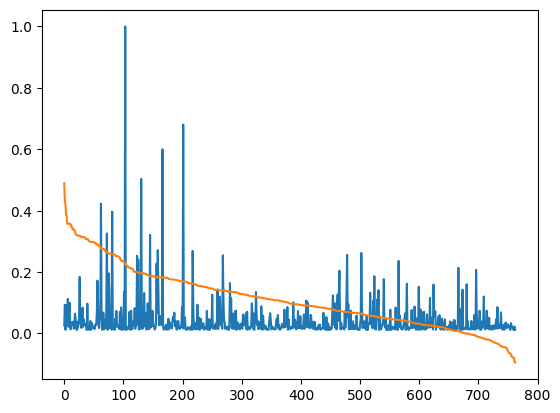

In [59]:
plt.plot(ds_tfidf_terms.importance.values/ds_tfidf_terms.importance.values.max())
plt.plot(ds_tfidf_terms.NLP_similarity.values)

## Save work

In [60]:
save_obj(ds_tfidf_terms,f'ds_{area}_tfidf_terms')

In [62]:
ds_tfidf_terms.to_excel(f'ds_{area}_tfidf_terms.xlsx')

In [63]:
ds_tfidf_terms

,term,wiki_definition,context_sent,importance,NLP_similarity
53,building deconstruction,"In the context of physical construction, decon...",[] developed bim-based deconstruction assessme...,2.280702,0.488909
138,construction waste,Construction waste or debris is any kind of de...,kazmi chakraborty journal engineering applied ...,8.277890,0.427581
202,electronic waste,Electronic waste (or e-waste) describes discar...,review circulating e-waste recovery constructi...,1.076244,0.422629
229,environmental assessment,Environmental Impact assessment (EIA) is the a...,"using bim-based framework, economic environmen...",8.236292,0.386762
571,resource recovery,Resource recovery is using wastes as an input ...,identify assess important circularity indicato...,3.585023,0.383116
...,...,...,...,...,...
415,member states,A member state is a state that is a member of ...,recycling rates mineral fraction construction ...,1.957719,-0.078459
47,book series,A book series is a sequence of books having ce...,"document type ﬁlter, following options selecte...",1.030574,-0.079210
383,local authorities,Local government is a generic term for the low...,"current research, collaboration ﬁnancial suppo...",1.001902,-0.079333
364,latin america,Latin America is a collective region of the Am...,"key competitors industry north america, latin ...",1.991928,-0.090297
